In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


dataframes = {
    'mean': pd.read_csv('imputed/mean.csv'),
    'median': pd.read_csv('imputed/median.csv'),
    'mode': pd.read_csv('imputed/mode.csv'),
    'KNN': pd.read_csv('imputed/KNN.csv'),
    'MICE': pd.read_csv('imputed/MICE.csv'),
    'iterative': pd.read_csv('imputed/iterative.csv'),
}

# Gradient boosting machines

In [1]:
# !pip install xgboost

import xgboost as xgb
from util.functions import train

model = xgb.XGBClassifier()

results = train(model)

    

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.6 kB/s eta 0:00:0000:0100:04m
learning with mean imputed data
learning with median imputed data
learning with mode imputed data
learning with KNN imputed data
learning with MICE imputed data
learning with iterative imputed data


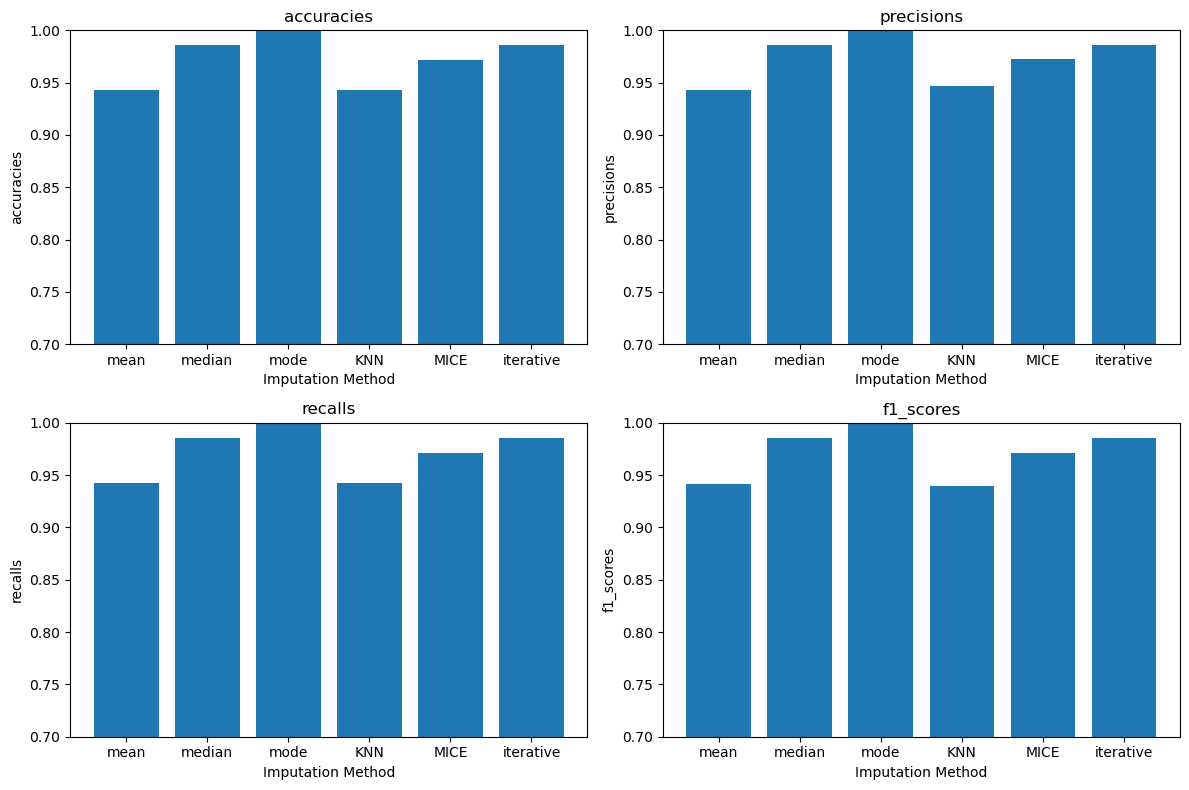

In [2]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])
    

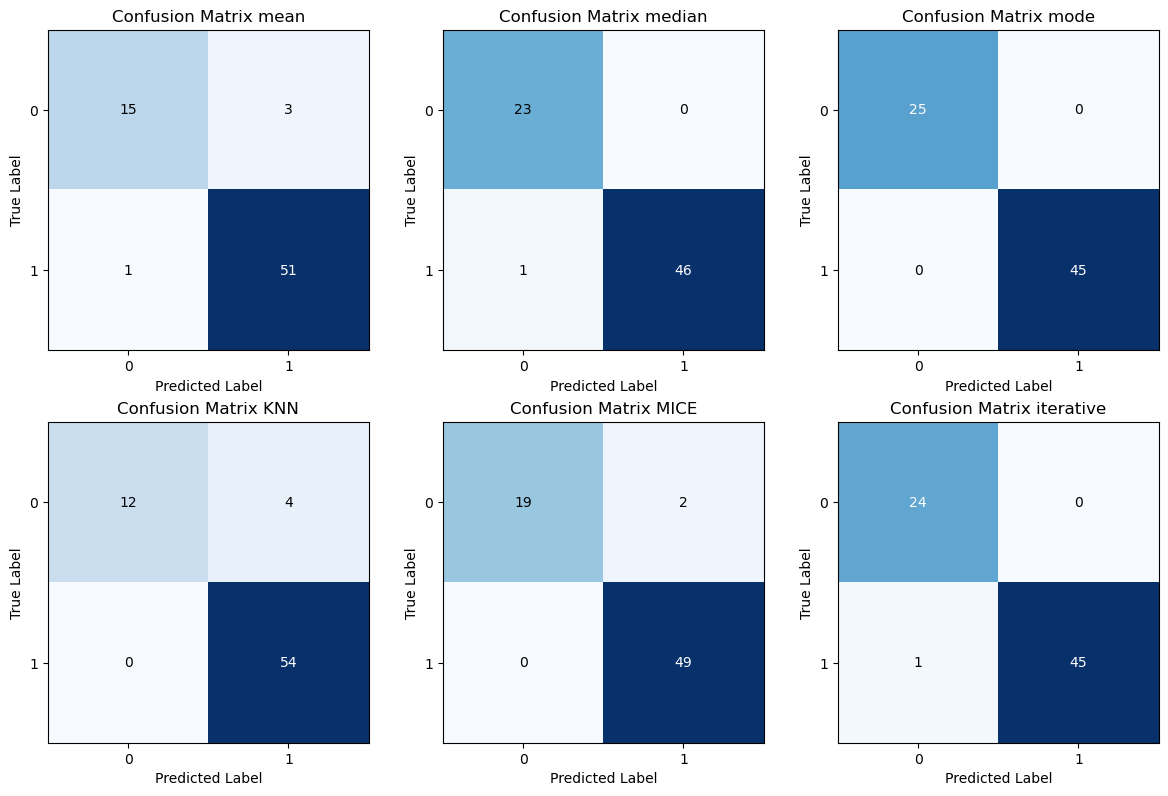

In [3]:
from util.functions import plot_confusion_matrices
plot_confusion_matrices(results['confusion_matrices'])

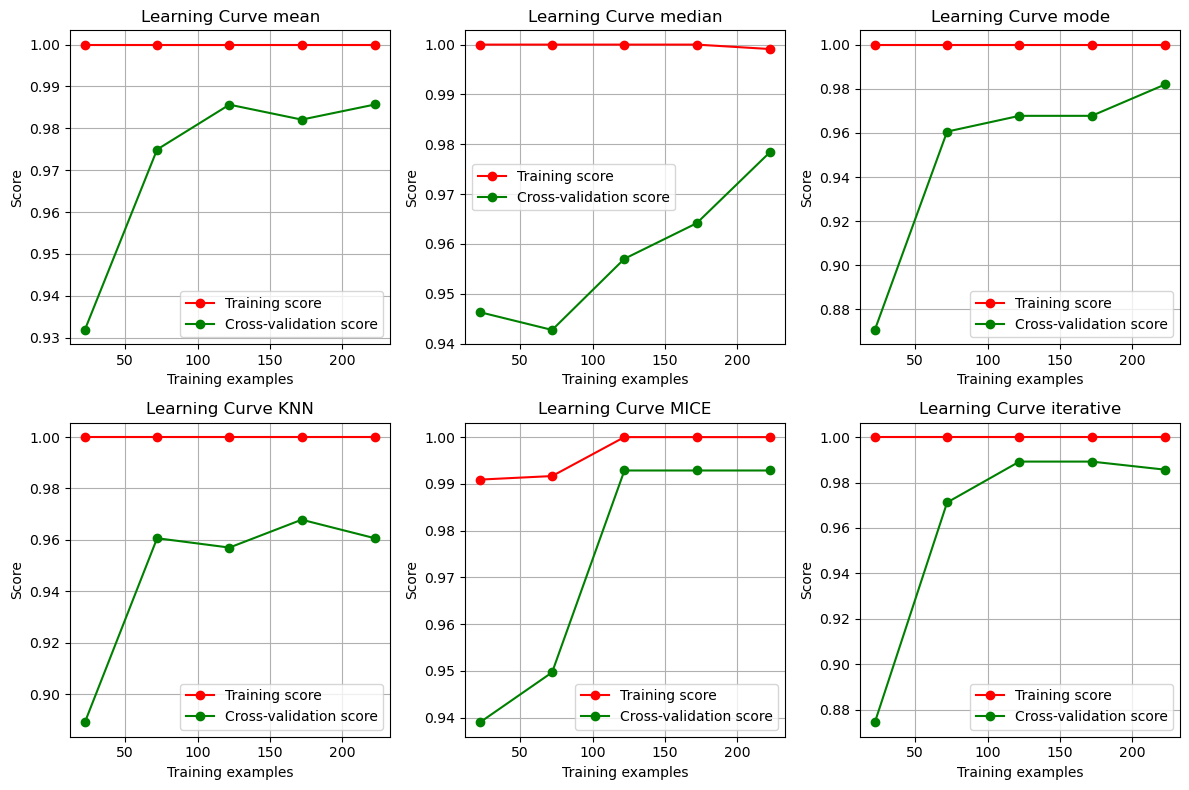

In [4]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

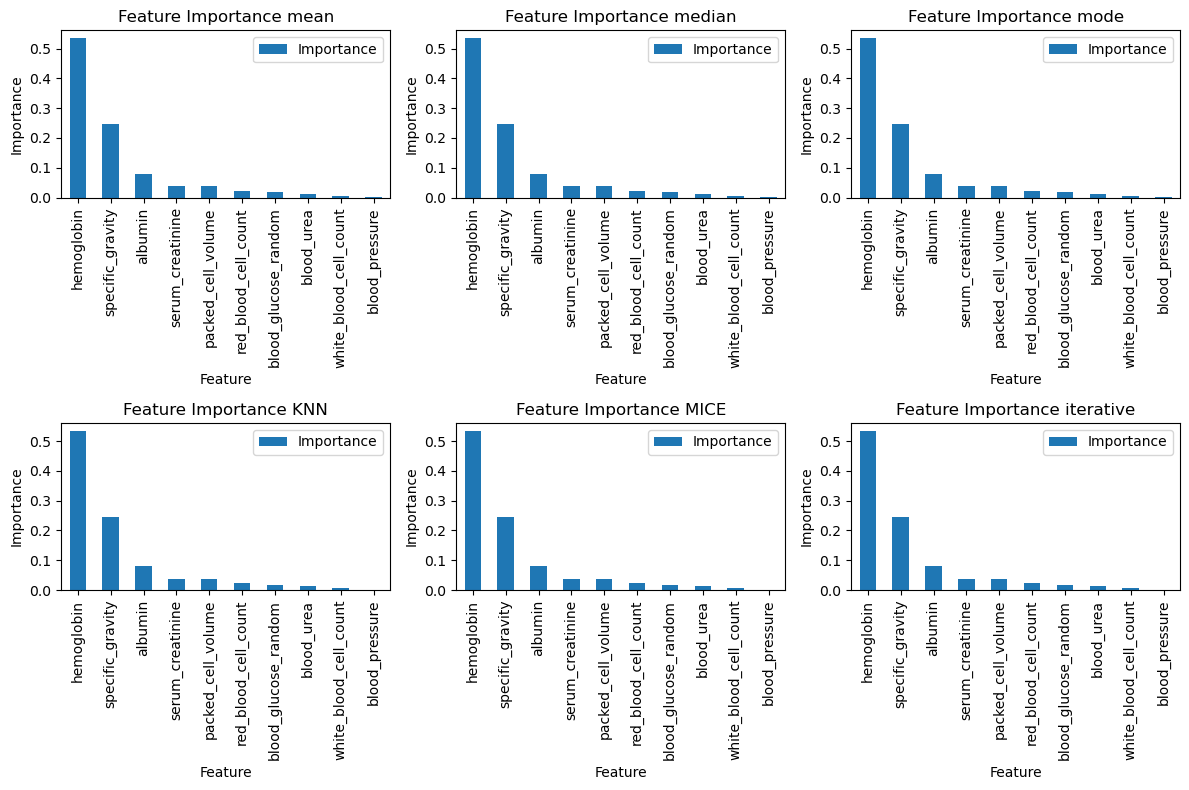

In [7]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
feature_importances = {}
for (name, model) in results['models'].items():
    feature_importances[name] = pd.DataFrame(
        model.feature_importances_, index=dataframes['mean'].drop(columns=['class']).columns, columns=['Importance'])

plot_feature_importances(feature_importances)